<a href="https://colab.research.google.com/github/leonarddocchagas/data_science/blob/master/CTTU_Autarquia_de_Tr%C3%A2nsito_e_Transporte_Urbano_do_Recife.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/leonarddocchagas/data_science/blob/master/projetos/cttu_transito_e_transporte_recife/logo-cttu.png?raw=true" alt='CTTU' />

**Autarquia de Trânsito e Transporte Urbano do Recife**

Vamos analisar o orgão responsável por fiscalizar o transito da cidade de Recife. Abaixo segue, uma breve descrição retirada do próprio site da entidade.

A Autarquia de Trânsito e Transporte Urbano do Recife (CTTU) é uma sociedade de economia mista integrante da Administração Indireta Municipal e é responsável pelo monitoramento, controle e fiscalização do trânsito e do transporte na capital. 

Compete à CTTU também a regulamentação do Sistema Municipal de Transporte Público de Passageiros, que é explorado sob a forma de permissão ou autorização nos modais de táxi, transporte complementar (linhas interbairros e alimentadoras) e transporte escolar, ações de estudos e projetos de melhoria da mobilidade urbana e sua efetiva implantação e de educação para o trânsito.

##Sobre os dados
Teremos analise de Acidentes de Trânsito com e sem vitimas 2016 - 2020.

  * A Autarquia de Trânsito e Transporte Urbano do Recife (CTTU)
      * http://dados.recife.pe.gov.br/dataset/acidentes-de-transito-com-e-sem-vitimas

**Nota.** Nosso dataset foi disponibilizado de forma separa, então, vamos carregar quatro arquivos, um referente para cada ano e depois, unificar em um único conjunto de dados. 

## Obtenção e transformação dos dados

In [53]:
# bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# carrega todos os datasets

# dataset 2016
PATH = 'https://raw.githubusercontent.com/leonarddocchagas/data_science/master/projetos/cttu_transito_e_transporte_recife/acidentes_2016.csv'
acidentes_2016 = pd.read_csv(PATH, delimiter=";")

# dataset 2017
PATH = 'https://raw.githubusercontent.com/leonarddocchagas/data_science/master/projetos/cttu_transito_e_transporte_recife/acidentes_2017.csv'
acidentes_2017 = pd.read_csv(PATH, delimiter=";")

# dataset 2018
# detectamos que o dataset(acidentes_2018) possuia a coluna 'DATA' em caixa alta, ou seja, diferentes dos demais. 
PATH = 'https://raw.githubusercontent.com/leonarddocchagas/data_science/master/projetos/cttu_transito_e_transporte_recife/acidentes_2018.csv'
acidentes_2018 = pd.read_csv(PATH, delimiter=";")
acidentes_2018.rename(columns={'DATA':'data'}, inplace=True)

# dataset 2019
# detectamos que o dataset(acidentes_2019) possuia a coluna 'DATA' em caixa alta, ou seja, diferentes dos demais. 
PATH = 'https://raw.githubusercontent.com/leonarddocchagas/data_science/master/projetos/cttu_transito_e_transporte_recife/acidentes-2019.csv'
acidentes_2019 = pd.read_csv(PATH, delimiter=";")
acidentes_2019.rename(columns={'DATA':'data'}, inplace=True)

# dataset 2020
PATH = 'https://raw.githubusercontent.com/leonarddocchagas/data_science/master/projetos/cttu_transito_e_transporte_recife/acidentes-2020.csv'
acidentes_2020 = pd.read_csv(PATH, delimiter=";")

Um ponto para ser observado. Apesar de, as fontes de dados serem do mesmo repositório e que, teoricamente deveriam estar no mesmo padrão, mas, como sabemos, na "vida real" não é assim que acontece. Por isso, muita atenção na hora de coletar e transformar o dado. É importante separar e olhar cada um de forma individual. 

Em nosso exemplo, tanto o nome da coluna 'data' quanto o nome do arquivo, não seguiram o mesmo padrão. Para os datasets(2016, 2017, 2018), foram escritos com '_' separando o ano e, a coluna 'data', escrita em 'caixa baixa'. Já os datasets(2018, 2019), foram criado com '-' separando o ano e também, a coluna data está escrita em 'caixa alta'.

**Tratando dataset**

In [55]:
# contatenando os conjuntos de dados
df = pd.concat([acidentes_2016, acidentes_2017, acidentes_2018, acidentes_2019, acidentes_2020])

In [56]:
# exibindo colunas datasets unificados
df.columns

Index(['data', 'hora', 'natureza_acidente', 'situacao', 'bairro', 'endereco',
       'numero', 'detalhe_endereco_acidente', 'complemento',
       'endereco_cruzamento', 'numero_cruzamento', 'referencia_cruzamento',
       'bairro_cruzamento', 'tipo', 'descricao', 'auto', 'moto', 'ciclom',
       'ciclista', 'pedestre', 'onibus', 'caminhao', 'viatura', 'outros',
       'vitimas', 'vitimasfatais', 'num_semaforo', 'sentido_via',
       'acidente_verificado', 'tempo_clima', 'situacao_semaforo',
       'sinalizacao', 'condicao_via', 'conservacao_via', 'ponto_controle',
       'situacao_placa', 'velocidade_max_via', 'mao_direcao', 'divisao_via1',
       'divisao_via2', 'divisao_via3'],
      dtype='object')

In [57]:
# eliminando colunas que não vamos utilizar
df = df.drop(
      columns=(
            ['endereco', 'complemento', 'endereco_cruzamento', 'numero_cruzamento', 'referencia_cruzamento', 'bairro_cruzamento', 
             'numero', 'detalhe_endereco_acidente', 'descricao','divisao_via1', 'divisao_via2', 'divisao_via3', 'ponto_controle', 'situacao_placa', 
             'velocidade_max_via', 'situacao_semaforo', 'sinalizacao', 'condicao_via', 'conservacao_via', 'mao_direcao', 'viatura', 'outros',
             'ciclom','num_semaforo','sentido_via','vitimasfatais', 'natureza_acidente', 'caminhao', 'tipo', 'vitimas']
            ))

In [58]:
# exibindo colunas depois da limpeza
df.columns

Index(['data', 'hora', 'situacao', 'bairro', 'auto', 'moto', 'ciclista',
       'pedestre', 'onibus', 'acidente_verificado', 'tempo_clima'],
      dtype='object')

In [59]:
# convertendo coluna data tipo objetct para tipo data
df['data'] = pd.to_datetime(df['data'])

In [60]:
# adicionando coluna ano
df['Ano'] = df.data.dt.year

In [61]:
# exibindo dataset
df.tail()

,data,hora,situacao,bairro,auto,moto,ciclista,pedestre,onibus,acidente_verificado,tempo_clima,Ano
2605,2020-05-31,06:25:00,CANCELADA,BOA VIAGEM,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2020
2606,2020-05-31,14:18:00,FINALIZADA,CORDEIRO,1.0,1.0,NaN,NaN,NaN,Longo da via,Bom,2020
2607,2020-05-31,22:04:00,CANCELADA,NOVA DESCOBERTA,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2020
2608,2020-05-27,08:53:00,FINALIZADA,TORRÕES,2.0,NaN,NaN,NaN,NaN,Longo da via,Bom,2020
2609,2020-05-28,09:01:00,FINALIZADA,PINA,2.0,NaN,NaN,NaN,NaN,Cruzamento,Bom,2020


**Tamanho e faltantes**

In [62]:
# tamanho
print('Temos em nosso dataset')
print('{} ENTRADAS e {} VARIÁVEIS' .format(df.shape[0], df.shape[1]))

Temos em nosso dataset
49104 ENTRADAS e 12 VARIÁVEIS


In [63]:
# faltantes ou nulos
df.isnull().sum() / df.shape[0]

data                   0.000000
hora                   0.001120
situacao               0.001059
bairro                 0.005519
auto                   0.086877
moto                   0.756598
ciclista               0.986050
pedestre               0.978535
onibus                 0.848831
acidente_verificado    0.731305
tempo_clima            0.719901
Ano                    0.000000
dtype: float64

Um ponto importante sobre os dados faltantes/nulos. Identificamos muitas columas com dados faltantes e, não necessariamente significa que as informações não cadastradas, tenha sido uma falha. O motivo, pode ter sido de forma intencional, por conta da técnica empregada na coleta dos dados. 

In [64]:
df.dtypes

data                   datetime64[ns]
hora                           object
situacao                       object
bairro                         object
auto                          float64
moto                          float64
ciclista                      float64
pedestre                      float64
onibus                        float64
acidente_verificado            object
tempo_clima                    object
Ano                             int64
dtype: object

##Visualizando os dados

In [65]:
# exibindo as 5 primeiras linhas
df.head()

,data,hora,situacao,bairro,auto,moto,ciclista,pedestre,onibus,acidente_verificado,tempo_clima,Ano
0,2016-01-01,00:58:00,FINALIZADA,IPUTINGA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2016
1,2016-01-01,01:23:00,FINALIZADA,BOA VIAGEM,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2016
2,2016-01-01,01:42:00,CANCELADA,JORDÃO,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2016
3,2016-01-01,03:08:00,FINALIZADA,IBURA,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2016
4,2016-01-01,05:34:00,CANCELADA,PAISSANDU,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2016


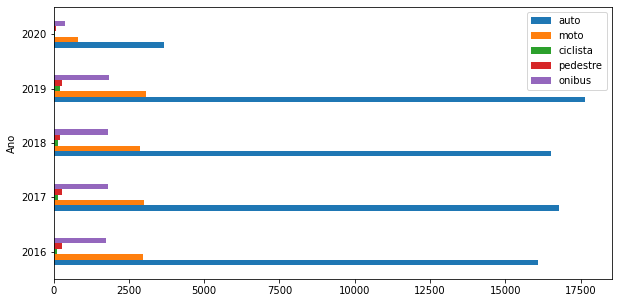

In [66]:
# quantidade de acidentes por grupo
df.groupby('Ano').sum().plot(kind='barh', figsize=(10, 5));

In [67]:
# top10 por bairro
df.bairro.value_counts().head(10)

BOA VIAGEM      6373
IMBIRIBEIRA     2928
SANTO AMARO     2276
AFOGADOS        1931
BOA VISTA       1922
MADALENA        1877
DERBY           1514
IPSEP           1338
CASA AMARELA    1331
PINA            1300
Name: bairro, dtype: int64

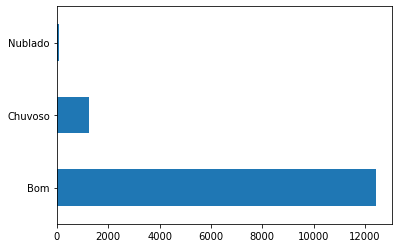

In [80]:
# questão climática
df.tempo_clima.value_counts().plot(kind='barh');

##**Conlusão**

Apesar da baixa qualidade da coleta de dados feita pela CTTU, com poucas informações relevantes, foi possível extrair algumas insight. O dataset contém 49.104 ocorrencias e está distribuído para os últimos 4 anos. 

Entre os bairros com maior número de registro, Boa Viagem se destaca, contabilizando 6.373 acidentes, o que o coloca em primeiro do rank. Vimos também que, ao contrário do que se pensava, acidentes envolvendo automóvies é em disparada os maiores motivos dos chamados.

Outro ponto possível de observação foi que, aparecentemente o clima chuvoso não contribui diretamente para o aumento do número de acidentes. Mas, seria necessário uma investigação mais criteriosa para cravar este levantamento. 